In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../data"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

sample_submission.csv
train.csv



In [2]:
# Get first 10000 rows and print some info about columns
train = pd.read_csv("../data/train.csv", parse_dates=['srch_ci', 'srch_co'], nrows=10000)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
date_time                    10000 non-null object
site_name                    10000 non-null int64
posa_continent               10000 non-null int64
user_location_country        10000 non-null int64
user_location_region         10000 non-null int64
user_location_city           10000 non-null int64
orig_destination_distance    6271 non-null float64
user_id                      10000 non-null int64
is_mobile                    10000 non-null int64
is_package                   10000 non-null int64
channel                      10000 non-null int64
srch_ci                      9993 non-null datetime64[ns]
srch_co                      9993 non-null datetime64[ns]
srch_adults_cnt              10000 non-null int64
srch_children_cnt            10000 non-null int64
srch_rm_cnt                  10000 non-null int64
srch_destination_id          10000 non-null int64
srch_destination_type_id

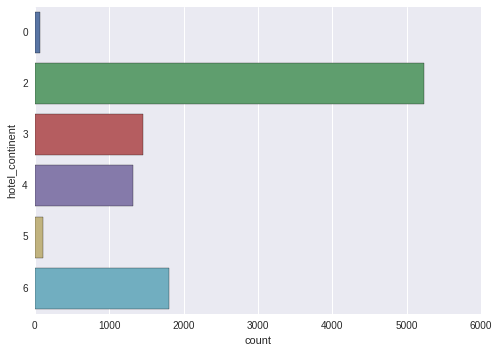

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
# preferred continent destinations
sns.countplot(y='hotel_continent', data=train)

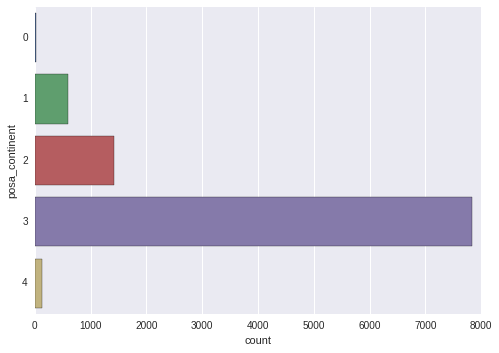

In [4]:
# most of people booking are from continent 3 I guess is one of the rich continent?
sns.countplot(y='posa_continent', data=train)

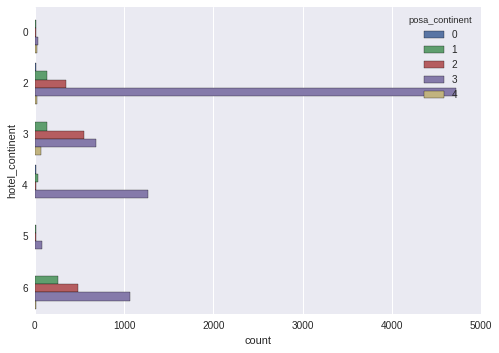

In [5]:
# putting the two above together
sns.countplot(y='hotel_continent', hue='posa_continent', data=train)

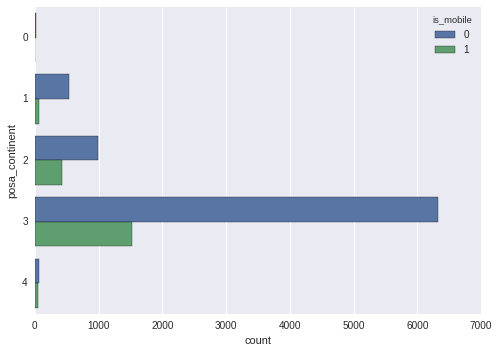

In [6]:
# how many people by continent are booking from mobile
sns.countplot(y='posa_continent', hue='is_mobile', data = train)

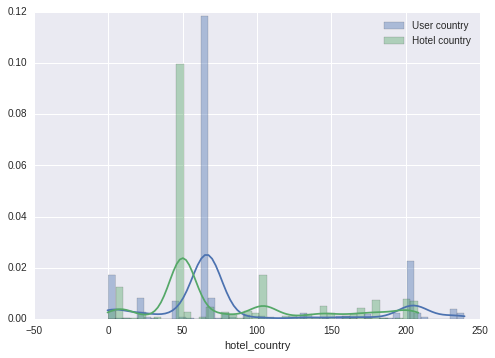

In [7]:
# Difference between user and destination country
sns.distplot(train['user_location_country'], label="User country")
sns.distplot(train['hotel_country'], label="Hotel country")
plt.legend()

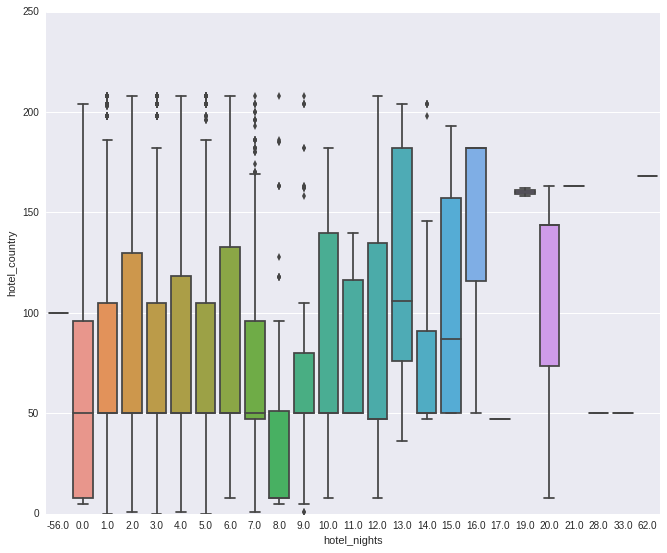

In [8]:
import numpy as np
# get number of booked nights as difference between check in and check out
hotel_nights = train['srch_co'] - train['srch_ci'] 
hotel_nights = (hotel_nights / np.timedelta64(1, 'D')).astype(float) # convert to float to avoid NA problems
train['hotel_nights'] = hotel_nights
plt.figure(figsize=(11, 9))
sns.boxplot(x='hotel_nights', y='hotel_country', data=train)

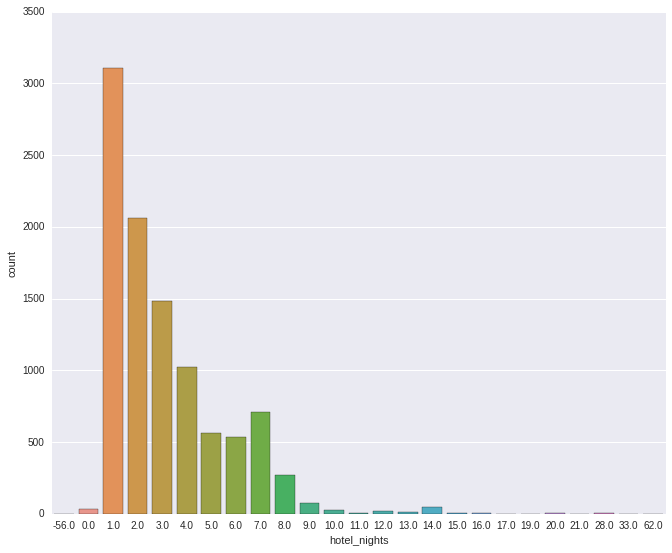

In [9]:
plt.figure(figsize=(11, 9))
sns.countplot(x="hotel_nights", data=train)

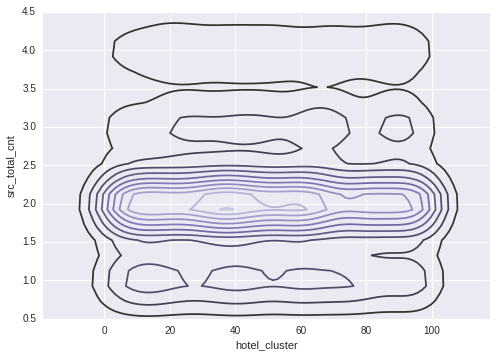

In [10]:
# distribution of the total number of people per cluster
src_total_cnt = train.srch_adults_cnt + train.srch_children_cnt
train['src_total_cnt'] = src_total_cnt
ax = sns.kdeplot(train['hotel_cluster'], train['src_total_cnt'], cmap="Purples_d")
lim = ax.set(ylim=(0.5, 4.5))